In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split


In [2]:
import plotly.figure_factory as ff
import re
import string
from collections import Counter
import plotly.express as px
import spacy

In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape)
print(df_test.shape)

(27481, 4)
(3534, 3)


In [5]:
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


# Data processing

In [7]:
df_train

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


## Text

In [8]:
df_train['text']=df_train['text'].str.lower()

In [9]:
# Remove all urls
urls = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
df_train['text']=df_train['text'].map(lambda char:re.sub(urls, "", char))

In [10]:
# Remove all numbers
df_train['text']=df_train['text'].map(lambda s:''.join([i for i in s if not i.isdigit()]))

In [11]:
df_train['text']=df_train['text'].map(lambda char:re.sub(r'^\s*|\s\s*', ' ', char).strip())

In [12]:
# Remove all Punc.
df_train['text']=df_train['text'].str.replace(r'[^\w\s]+', '')

In [13]:
# Remove special char
df_train['text']= df_train['text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

In [14]:
import unicodedata
df_train['text']= df_train['text'].map(lambda char:unicodedata.normalize('NFKD', char).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

## Selected Text

In [15]:
df_train['selected_text']=df_train['selected_text'].str.lower()
# Remove all urls
urls = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
df_train['selected_text']=df_train['selected_text'].map(lambda char:re.sub(urls, "", char))
# Remove all numbers
df_train['selected_text']=df_train['selected_text'].map(lambda s:''.join([i for i in s if not i.isdigit()]))
df_train['selected_text']=df_train['selected_text'].map(lambda char:re.sub(r'^\s*|\s\s*', ' ', char).strip())
# Remove all Punc.
df_train['selected_text']=df_train['selected_text'].str.replace(r'[^\w\s]+', '')
# Remove special char
df_train['selected_text']= df_train['selected_text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
df_train['selected_text']= df_train['selected_text'].map(lambda char:unicodedata.normalize('NFKD', char).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

In [16]:
'''from autocorrect import Speller
spell = Speller(lang="en")
tokenizer = RegexpTokenizer(r'\w+')

df_train.text = df_train.text.map(lambda x:tokenizer.tokenize(x))  #remove punctuation and tokenize
df_train.text = df_train.text.map(lambda x:[spell(i) for i in x])  #spell check'''

'from autocorrect import Speller\nspell = Speller(lang="en")\ntokenizer = RegexpTokenizer(r\'\\w+\')\n\ndf_train.text = df_train.text.map(lambda x:tokenizer.tokenize(x))  #remove punctuation and tokenize\ndf_train.text = df_train.text.map(lambda x:[spell(i) for i in x])  #spell check'

In [17]:
df_train

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rele...,sons of,negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on denver husband los...,d lost,negative
27477,4f4c4fc327,ive wondered about rake to the client has made...,dont force,negative
27478,f67aae2310,yay good for both of you enjoy the break you ...,yay good for both of you,positive
27479,ed167662a5,but it was worth it,but it was worth it,positive


# Models

In [18]:
import gensim
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from tensorflow.keras.utils import to_categorical
import keras
from time import time
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [19]:
from keras.models import Sequential
from keras import regularizers
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras import layers
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [20]:
# Text
df = df_train
df['text'] = df['text'].map(lambda x:str(x))
df['sentiment'] = df_train['sentiment'].astype("category")
df['sentiment'] = df_train['sentiment'].cat.codes

In [21]:
df_test

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [22]:
y=df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(df['text'].values, y,stratify=df['sentiment'].values, test_size=0.3,random_state=1)

#y_train = to_categorical(y_train)

# x_test, x_val , y_test, y_val = train_test_split(x_test, y_test,stratify=y_test, test_size=0.5,random_state=1)
# x_val = x_test[0:4122]
# y_val = to_categorical(y_test[0:4122])
# x_test = x_test[4122:]
# y_test = y_test[4122:]

print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))
# print("X_val shape  : {}".format(x_val.shape))
# print("y val shape  : {}".format(y_val.shape))


X_train shape: (19236,)
y_train shape: (19236,)
X_test shape : (8244,)
y_test shape : (8244,)


In [23]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df.text.values)


sequence_train=tokenizer.texts_to_sequences(x_train)
sequence_test=tokenizer.texts_to_sequences(x_test)

word_index = tokenizer.word_index

In [24]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 26631 number of independent tokens


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(19236, 32)

In [26]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(8244, 32)

In [27]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)

x=Dense(3,activation='softmax')(x)
model=Model(i,x)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 32, 20)            532640    
_________________________________________________________________
conv1d (Conv1D)              (None, 30, 32)            1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 64)             6208      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195   

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
193/193 [==============================] - 6s 22ms/step - loss: 0.9875 - accuracy: 0.4923 - val_loss: 0.7898 - val_accuracy: 0.6502
Epoch 2/5
193/193 [==============================] - 4s 19ms/step - loss: 0.6994 - accuracy: 0.7004 - val_loss: 0.6940 - val_accuracy: 0.7124
Epoch 3/5
193/193 [==============================] - 4s 20ms/step - loss: 0.5818 - accuracy: 0.7674 - val_loss: 0.6993 - val_accuracy: 0.7105
Epoch 4/5
193/193 [==============================] - 4s 18ms/step - loss: 0.5098 - accuracy: 0.8023 - val_loss: 0.7344 - val_accuracy: 0.7031
Epoch 5/5
193/193 [==============================] - 3s 17ms/step - loss: 0.4480 - accuracy: 0.8314 - val_loss: 0.7864 - val_accuracy: 0.6893


In [29]:
y_pred=model.predict(data_test)
y_pred

array([[8.6476153e-01, 1.3017066e-01, 5.0678030e-03],
       [2.5033049e-02, 9.3581069e-01, 3.9156277e-02],
       [4.7075182e-02, 8.1215316e-01, 1.4077170e-01],
       ...,
       [5.6617576e-01, 4.3037245e-01, 3.4518945e-03],
       [9.0323442e-01, 9.4934002e-02, 1.8316156e-03],
       [6.1919214e-04, 1.3877386e-01, 8.6060697e-01]], dtype=float32)

In [30]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 1, ..., 0, 0, 2], dtype=int64)

Text(33.0, 0.5, 'y_pred')

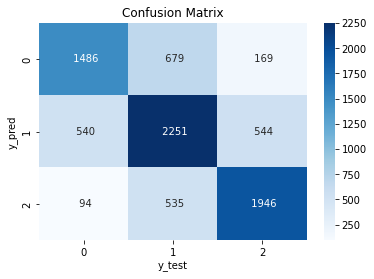

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      2334
           1       0.65      0.67      0.66      3335
           2       0.73      0.76      0.74      2575

    accuracy                           0.69      8244
   macro avg       0.69      0.69      0.69      8244
weighted avg       0.69      0.69      0.69      8244



In [33]:
# selected text
df = df_train
df['text'] = df['selected_text'].map(lambda x:str(x))
df['sentiment'] = df_train['sentiment'].astype("category")
df['sentiment'] = df_train['sentiment'].cat.codes

In [34]:
y=df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(df['text'].values, y,stratify=df['sentiment'].values, test_size=0.3,random_state=1)

#y_train = to_categorical(y_train)

# x_test, x_val , y_test, y_val = train_test_split(x_test, y_test,stratify=y_test, test_size=0.5,random_state=1)
# x_val = x_test[0:4122]
# y_val = to_categorical(y_test[0:4122])
# x_test = x_test[4122:]
# y_test = y_test[4122:]

print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))
# print("X_val shape  : {}".format(x_val.shape))
# print("y val shape  : {}".format(y_val.shape))


X_train shape: (19236,)
y_train shape: (19236,)
X_test shape : (8244,)
y_test shape : (8244,)


In [35]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df.text.values)


sequence_train=tokenizer.texts_to_sequences(x_train)
sequence_test=tokenizer.texts_to_sequences(x_test)

word_index = tokenizer.word_index

In [36]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 17827 number of independent tokens


In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(19236, 31)

In [38]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(8244, 31)

In [39]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)

x=Dense(3,activation='softmax')(x)
model=Model(i,x)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 31)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 31, 20)            356560    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 32)            1952      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 7, 64)             6208      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195 

In [51]:
pip install python-graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [53]:
import pydot
import graphviz
import tensorflow as tf
tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="LR",
expand_nested=True,
dpi=96,
layer_range=None,
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
193/193 [==============================] - 5s 17ms/step - loss: 0.9042 - accuracy: 0.5470 - val_loss: 0.8181 - val_accuracy: 0.6225
Epoch 2/5
193/193 [==============================] - 3s 16ms/step - loss: 0.7910 - accuracy: 0.6269 - val_loss: 0.8034 - val_accuracy: 0.6279
Epoch 3/5
193/193 [==============================] - 3s 18ms/step - loss: 0.7341 - accuracy: 0.6553 - val_loss: 0.7878 - val_accuracy: 0.6464
Epoch 4/5
193/193 [==============================] - 3s 17ms/step - loss: 0.6664 - accuracy: 0.6785 - val_loss: 0.7793 - val_accuracy: 0.6507
Epoch 5/5
193/193 [==============================] - 3s 15ms/step - loss: 0.6182 - accuracy: 0.6994 - val_loss: 0.8005 - val_accuracy: 0.6538


In [42]:
y_pred=model.predict(data_test)
y_pred

array([[0.45050693, 0.06230882, 0.48718417],
       [0.35765833, 0.22353043, 0.41881123],
       [0.45050693, 0.06230882, 0.48718417],
       ...,
       [0.45050693, 0.06230882, 0.48718417],
       [0.45050701, 0.06230883, 0.48718417],
       [0.00544139, 0.9878819 , 0.00667669]], dtype=float32)

In [43]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

Text(33.0, 0.5, 'y_pred')

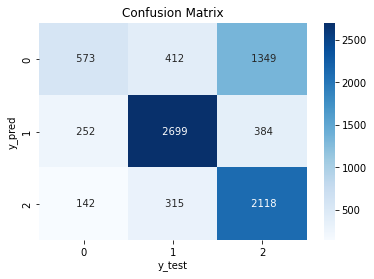

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.25      0.35      2334
           1       0.79      0.81      0.80      3335
           2       0.55      0.82      0.66      2575

    accuracy                           0.65      8244
   macro avg       0.64      0.63      0.60      8244
weighted avg       0.66      0.65      0.63      8244

